## Load libraries

In [25]:
import numpy as np
import pandas as pd
import optuna
import sklearn.linear_model
import sklearn.metrics
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline
# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_slice

SEED = 42

np.random.seed(SEED)


## Load datasets functions

In [26]:

def read_train_dataset():
    data_train = pd.read_csv('../data/train_dataset/train_final.csv',index_col=None)
    data_train.drop(['Unnamed: 0'],axis=1,inplace=True)
    # División de dataset de entrenaimento y validación
    X = data_train.drop(columns='Item_Outlet_Sales') 
    Y = data_train['Item_Outlet_Sales']
    return X,Y

def read_test_dataset():
    data_test = pd.read_csv('../data/train_dataset/test_final.csv',index_col=None)
    data_test.drop(['Unnamed: 0'],axis=1,inplace=True)
    # División de dataset de entrenaimento y validación
    X = data_test.drop(columns='Item_Outlet_Sales') 
    Y = data_test['Item_Outlet_Sales']
    return X,Y



## Regresión por Ridge y Lasso

In [27]:


def objective(trial):
    # hyperparameter setting
    regression_method = trial.suggest_categorical('regression_method', ('ridge', 'lasso'))
    if regression_method == 'ridge':
        ridge_alpha = trial.suggest_uniform('ridge_alpha', 0.0, 2.0)
        model = sklearn.linear_model.Ridge(alpha=ridge_alpha)
    else:
        lasso_alpha = trial.suggest_uniform('lasso_alpha', 0.0, 2.0)
        model = sklearn.linear_model.Lasso(alpha=lasso_alpha)

    # data loading and train-test split
    X_train, y_train = read_train_dataset()
    X_val, y_val = read_train_dataset()

    # model training and evaluation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    error = sklearn.metrics.mean_squared_error(y_val, y_pred)

    # output: evaluation score
    return error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

[I 2023-06-25 16:30:50,028] A new study created in memory with name: no-name-213efa1f-970d-4578-a39d-b2d599f97e61
/tmp/ipykernel_53096/2552602311.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  lasso_alpha = trial.suggest_uniform('lasso_alpha', 0.0, 2.0)
[I 2023-06-25 16:30:50,073] Trial 0 finished with value: 1351648.0482339766 and parameters: {'regression_method': 'lasso', 'lasso_alpha': 1.8248535280589937}. Best is trial 0 with value: 1351648.0482339766.
/tmp/ipykernel_53096/2552602311.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  ridge_alpha = trial.suggest_uniform('ridge_alpha', 0.0, 2.0)
[I 2023-06-25 16:30:50,099] Trial 1 finished with value: 1351111.1356734338 and parameters: {'regressio

In [28]:
print('Minimum mean squared error: ' + str(study.best_value))
print('Best parameter: ' + str(study.best_params))

study.trials_dataframe()

Minimum mean squared error: 1351111.0092332757
Best parameter: {'regression_method': 'ridge', 'ridge_alpha': 0.00961962204372567}


,number,value,datetime_start,datetime_complete,duration,params_lasso_alpha,params_regression_method,params_ridge_alpha,state
0,0,1.351648e+06,2023-06-25 16:30:50.030514,2023-06-25 16:30:50.073657,0 days 00:00:00.043143,1.824854,lasso,NaN,COMPLETE
1,1,1.351111e+06,2023-06-25 16:30:50.076134,2023-06-25 16:30:50.099179,0 days 00:00:00.023045,NaN,ridge,0.332793,COMPLETE
2,2,1.351112e+06,2023-06-25 16:30:50.100243,2023-06-25 16:30:50.132110,0 days 00:00:00.031867,NaN,ridge,0.689064,COMPLETE
3,3,1.351150e+06,2023-06-25 16:30:50.133168,2023-06-25 16:30:50.173874,0 days 00:00:00.040706,0.291451,lasso,NaN,COMPLETE
4,4,1.351114e+06,2023-06-25 16:30:50.174992,2023-06-25 16:30:50.201768,0 days 00:00:00.026776,NaN,ridge,1.734137,COMPLETE
5,5,1.351231e+06,2023-06-25 16:30:50.203136,2023-06-25 16:30:50.251364,0 days 00:00:00.048228,0.511363,lasso,NaN,COMPLETE
6,6,1.351516e+06,2023-06-25 16:30:50.252470,2023-06-25 16:30:50.317075,0 days 00:00:00.064605,1.342810,lasso,NaN,COMPLETE
7,7,1.351555e+06,2023-06-25 16:30:50.326635,2023-06-25 16:30:50.444478,0 days 00:00:00.117843,1.498698,lasso,NaN,COMPLETE
8,8,1.351111e+06,2023-06-25 16:30:50.445692,2023-06-25 16:30:50.512063,0 days 00:00:00.066371,NaN,ridge,0.576350,COMPLETE
9,9,1.351112e+06,2023-06-25 16:30:50.513824,2023-06-25 16:30:50.569341,0 days 00:00:00.055517,NaN,ridge,0.825508,COMPLETE


Entre un modelo de regresión por Lasso o Ridge, resulta con buenos resultados el modelo Ridge con hiperparámetro 'ridge_alpha': 0.003

### Gráficas del proceso de ajusto de hiperparámetros

/tmp/ipykernel_53096/3324289224.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

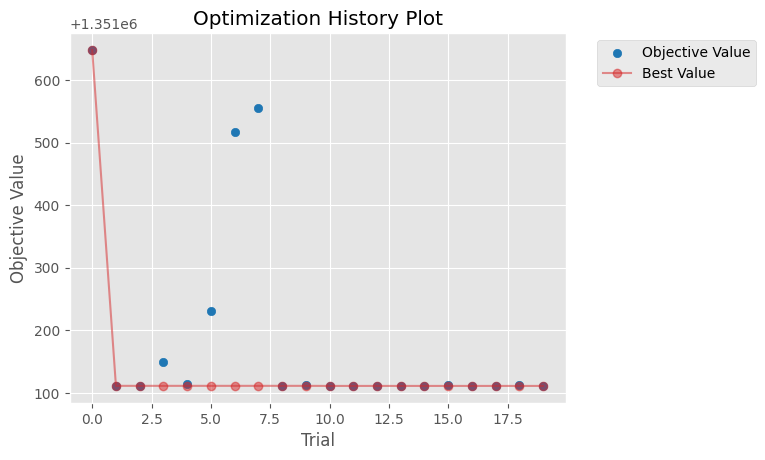

In [30]:
plot_optimization_history(study)

/tmp/ipykernel_53096/927314822.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  plot_contour(study)
[W 2023-06-25 16:30:51,595] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


array([[<Axes: ylabel='lasso_alpha'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='regression_method'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='lasso_alpha', ylabel='ridge_alpha'>,
        <Axes: xlabel='regression_method'>, <Axes: xlabel='ridge_alpha'>]],
      dtype=object)

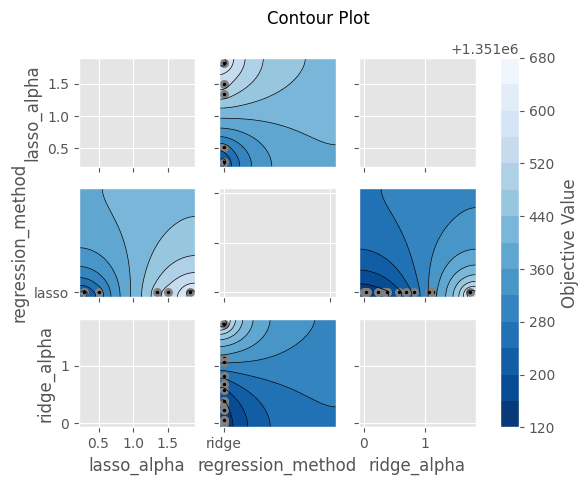

In [31]:
plot_contour(study)

## XGBRegressor model

In [32]:
def objective(trial):
    # data loading and train-test split
    X_train, y_train = read_train_dataset()
    X_val, y_val = read_train_dataset()

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_val, label=y_val)

    param = {
        "silent": 1,
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    error = sklearn.metrics.mean_squared_error(y_val, preds)
    return error

In [33]:
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
study = optuna.create_study(pruner=pruner, direction="minimize")
study.optimize(objective, n_trials=100)


[I 2023-06-25 16:30:53,089] A new study created in memory with name: no-name-0f9a6aad-c33c-4907-a953-0d3fb98899f9


[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2721.75159
[1]	validation-rmse:2675.55987
[2]	validation-rmse:2630.45932
[3]	validation-rmse:2586.42797
[4]	validation-rmse:2543.44634
[5]	validation-rmse:2501.50122


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[6]	validation-rmse:2460.55787
[7]	validation-rmse:2420.62892
[8]	validation-rmse:2381.65357
[9]	validation-rmse:2343.65053


[I 2023-06-25 16:30:53,324] Trial 0 finished with value: 5492697.826821234 and parameters: {'booster': 'gbtree', 'lambda': 0.7286573859348467, 'alpha': 1.342465142833002e-05, 'max_depth': 8, 'eta': 0.020391280229799937, 'gamma': 8.780198965798518e-07, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 5492697.826821234.


[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1762.03527
[1]	validation-rmse:1470.37992
[2]	validation-rmse:1411.83334
[3]	validation-rmse:1353.29035
[4]	validation-rmse:1314.31961
[5]	validation-rmse:1283.31723
[6]	validation-rmse:1259.61634
[7]	validation-rmse:1241.04814
[8]	validation-rmse:1226.44807
[9]	validation-rmse:1214.90156


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
[I 2023-06-25 16:30:53,383] Trial 1 finished with value: 1475985.8056094705 and parameters: {'booster': 'gblinear', 'lambda': 2.5880229047908175e-08, 'alpha': 0.046185599222267594}. Best is trial 1 with value: 1475985.8056094705.


[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2740.21025
[1]	validation-rmse:2711.78675
[2]	validation-rmse:2684.11866
[3]	validation-rmse:2656.84743
[4]	validation-rmse:2629.96884
[5]	validation-rmse:2603.14934
[6]	validation-rmse:2577.04720
[7]	validation-rmse:2551.32410
[8]	validation-rmse:2525.97607
[9]	validation-rmse:2500.99878


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1762.24595
[1]	validation-rmse:1470.00764
[2]	validation-rmse:1411.61342
[3]	validation-rmse:1353.07267
[4]	validation-rmse:1314.06670
[5]	validation-rmse:1283.09523
[6]	validation-rmse:1259.38695
[7]	validation-rmse:1240.83530
[8]	validation-rmse:1226.27082


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[9]	validation-rmse:1214.75655


[I 2023-06-25 16:30:53,528] Trial 3 finished with value: 1475633.470217328 and parameters: {'booster': 'gblinear', 'lambda': 3.998824375378446e-08, 'alpha': 3.936951576328933e-07}. Best is trial 3 with value: 1475633.470217328.


[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2585.77441
[1]	validation-rmse:2419.22319
[2]	validation-rmse:2268.02676
[3]	validation-rmse:2131.21784
[4]	validation-rmse:2007.57689


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[5]	validation-rmse:1895.68920
[6]	validation-rmse:1794.88386
[7]	validation-rmse:1704.46199
[8]	validation-rmse:1622.74409
[9]	validation-rmse:1549.31264


[I 2023-06-25 16:30:53,675] Trial 4 finished with value: 2400369.6381082037 and parameters: {'booster': 'dart', 'lambda': 0.37705439041148897, 'alpha': 2.4792549930230806e-06, 'max_depth': 9, 'eta': 0.07907123092165194, 'gamma': 0.0002151037903159153, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.446209450050053e-05, 'skip_drop': 7.737615210133793e-05}. Best is trial 3 with value: 1475633.470217328.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),


[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2769.04201
[1]	validation-rmse:2769.03372


/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been depre

[2]	validation-rmse:2769.02544
[3]	validation-rmse:2769.01714
[4]	validation-rmse:2769.00886


[I 2023-06-25 16:30:53,769] Trial 5 pruned. Trial was pruned at iteration 5.


[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1655.34455
[1]	validation-rmse:1509.84630
[2]	validation-rmse:1449.45175
[3]	validation-rmse:1403.41152
[4]	validation-rmse:1369.54386
[5]	validation-rmse:1343.85900
[6]	validation-rmse:1324.13986
[7]	validation-rmse:1308.81164
[8]	validation-rmse:1296.76255
[9]	validation-rmse:1287.19363


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
[I 2023-06-25 16:30:53,822] Trial 6 finished with value: 1656867.4285167316 and parameters: {'booster': 'gblinear', 'lambda': 0.12296554613226153, 'alpha': 0.002620406379356824}. Best is trial 3 with value: 1475633.470217328.


[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1676.15524
[1]	validation-rmse:1471.29737
[2]	validation-rmse:1409.47551
[3]	validation-rmse:1357.11638
[4]	validation-rmse:1318.80226
[5]	validation-rmse:1288.99385
[6]	validation-rmse:1265.77108
[7]	validation-rmse:1247.49486


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[8]	validation-rmse:1233.03186
[9]	validation-rmse:1221.51433


[I 2023-06-25 16:30:53,888] Trial 7 finished with value: 1492097.2636066182 and parameters: {'booster': 'gblinear', 'lambda': 0.018791379236824824, 'alpha': 4.968966454421428e-06}. Best is trial 3 with value: 1475633.470217328.


[16:30:53] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1586.20730
[1]	validation-rmse:1491.13573
[2]	validation-rmse:1432.27121
[3]	validation-rmse:1385.62048
[4]	validation-rmse:1351.13410
[5]	validation-rmse:1324.94184
[6]	validation-rmse:1306.21736
[7]	validation-rmse:1289.58535


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[8]	validation-rmse:1277.39900
[9]	validation-rmse:1265.64716


[I 2023-06-25 16:30:53,976] Trial 8 finished with value: 1601862.7403779153 and parameters: {'booster': 'gblinear', 'lambda': 0.07673353729630888, 'alpha': 0.02132802544444554}. Best is trial 3 with value: 1475633.470217328.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1762.08928
[1]	validation-rmse:1469.83226
[2]	validation-rmse:1413.32324
[3]	validation-rmse:1356.12001


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[4]	validation-rmse:1316.19482
[5]	validation-rmse:1284.90700
[6]	validation-rmse:1260.83288
[7]	validation-rmse:1242.01030
[8]	validation-rmse:1227.23126
[9]	validation-rmse:1215.53320


[I 2023-06-25 16:30:54,082] Trial 9 finished with value: 1477520.9598269844 and parameters: {'booster': 'gblinear', 'lambda': 5.441238179779798e-06, 'alpha': 1.2877427063667622e-06}. Best is trial 3 with value: 1475633.470217328.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2769.05029
[1]	validation-rmse:2769.05029
[2]	validation-rmse:2769.05022
[3]	validation-rmse:2769.05021
[4]	validation-rmse:2769.05021
[5]	validation-rmse:2769.05007


/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
[I 2023-06-25 16:30:54,168] Trial 10 pruned. Trial was pruned at iteration 5.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1760.28187
[1]	validation-rmse:1470.26564
[2]	validation-rmse:1410.49564
[3]	validation-rmse:1352.45684
[4]	validation-rmse:1313.93180
[5]	validation-rmse:1283.15872
[6]	validation-rmse:1259.53087
[7]	validation-rmse:1241.07243
[8]	validation-rmse:1226.49440
[9]	validation-rmse:1214.93179


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
[I 2023-06-25 16:30:54,236] Trial 11 finished with value: 1476059.2454467015 and parameters: {'booster': 'gblinear', 'lambda': 1.4201960401173021e-08, 'alpha': 0.8711281537605184}. Best is trial 3 with value: 1475633.470217328.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1762.20527
[1]	validation-rmse:1469.78043


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[2]	validation-rmse:1411.33342
[3]	validation-rmse:1358.15214
[4]	validation-rmse:1315.00606
[5]	validation-rmse:1284.55744
[6]	validation-rmse:1260.33955
[7]	validation-rmse:1241.54422
[8]	validation-rmse:1226.69978
[9]	validation-rmse:1214.96522


[I 2023-06-25 16:30:54,303] Trial 12 finished with value: 1476140.4887972858 and parameters: {'booster': 'gblinear', 'lambda': 2.190989583382489e-08, 'alpha': 0.0005909028853345688}. Best is trial 3 with value: 1475633.470217328.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1762.19152
[1]	validation-rmse:1469.86337
[2]	validation-rmse:1411.41791
[3]	validation-rmse:1353.02929
[4]	validation-rmse:1314.09955
[5]	validation-rmse:1283.17175
[6]	validation-rmse:1259.47829
[7]	validation-rmse:1240.90327
[8]	validation-rmse:1226.32922
[9]	validation-rmse:1214.79262


/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
[I 2023-06-25 16:30:54,370] Trial 13 finished with value: 1475721.1063398395 and parameters: {'booster': 'gblinear', 'lambda': 2.535819045788179e-07, 'alpha': 2.7930724347279265e-08}. Best is trial 3 with value: 1475633.470217328.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1762.15025
[1]	validation-rmse:1470.16433
[2]	validation-rmse:1412.51498
[3]	validation-rmse:1353.33453
[4]	validation-rmse:1314.91062
[5]	validation-rmse:1285.23915
[6]	validation-rmse:1260.72777
[7]	validation-rmse:1241.98763
[8]	validation-rmse:1227.20173


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[9]	validation-rmse:1215.52680


[I 2023-06-25 16:30:54,440] Trial 14 finished with value: 1477505.3971889068 and parameters: {'booster': 'gblinear', 'lambda': 3.5110045481194357e-07, 'alpha': 1.0640214762036237e-08}. Best is trial 3 with value: 1475633.470217328.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2768.93965
[1]	validation-rmse:2768.82895
[2]	validation-rmse:2768.71835
[3]	validation-rmse:2768.60770


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[4]	validation-rmse:2768.49701
[5]	validation-rmse:2768.38640


[I 2023-06-25 16:30:54,510] Trial 15 pruned. Trial was pruned at iteration 5.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1762.11998
[1]	validation-rmse:1470.36579
[2]	validation-rmse:1411.87104
[3]	validation-rmse:1353.29595
[4]	validation-rmse:1314.81006
[5]	validation-rmse:1284.07226
[6]	validation-rmse:1260.07884
[7]	validation-rmse:1241.42284
[8]	validation-rmse:1226.75311
[9]	validation-rmse:1215.14938


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
[I 2023-06-25 16:30:54,585] Trial 16 finished with value: 1476588.0186958683 and parameters: {'booster': 'gblinear', 'lambda': 1.947067832192215e-07, 'alpha': 2.6133100211102226e-07}. Best is trial 3 with value: 1475633.470217328.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1762.19072
[1]	validation-rmse:1469.87947
[2]	validation-rmse:1413.01095


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[3]	validation-rmse:1353.33916
[4]	validation-rmse:1314.30975
[5]	validation-rmse:1283.20671
[6]	validation-rmse:1259.44975
[7]	validation-rmse:1240.85073
[8]	validation-rmse:1226.26949
[9]	validation-rmse:1214.73322


[I 2023-06-25 16:30:54,678] Trial 17 finished with value: 1475576.797703447 and parameters: {'booster': 'gblinear', 'lambda': 2.6051559286675626e-06, 'alpha': 1.146683791302553e-07}. Best is trial 17 with value: 1475576.797703447.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.co

[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2769.05029
[1]	validation-rmse:2769.05026
[2]	validation-rmse:2769.05020
[3]	validation-rmse:2769.05010
[4]	validation-rmse:2769.05005


[I 2023-06-25 16:30:54,795] Trial 18 pruned. Trial was pruned at iteration 5.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1486.61007
[1]	validation-rmse:1176.90322
[2]	validation-rmse:1126.24489
[3]	validation-rmse:1115.04098
[4]	validation-rmse:1112.52369


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[5]	validation-rmse:1109.24646
[6]	validation-rmse:1106.80167
[7]	validation-rmse:1103.64416
[8]	validation-rmse:1102.32946
[9]	validation-rmse:1099.61851


[I 2023-06-25 16:30:54,910] Trial 19 finished with value: 1209160.870633374 and parameters: {'booster': 'gbtree', 'lambda': 0.00011497201562748701, 'alpha': 4.641690087669022e-05, 'max_depth': 3, 'eta': 0.6402767549237884, 'gamma': 1.6456912373809773e-08, 'grow_policy': 'depthwise'}. Best is trial 19 with value: 1209160.870633374.


[16:30:54] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1182.76031
[1]	validation-rmse:1116.16544
[2]	validation-rmse:1110.86364
[3]	validation-rmse:1106.66381
[4]	validation-rmse:1103.57714
[5]	validation-rmse:1101.81677
[6]	validation-rmse:1100.68672
[7]	validation-rmse:1097.99728


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[8]	validation-rmse:1095.48661
[9]	validation-rmse:1094.77633


[I 2023-06-25 16:30:55,007] Trial 20 finished with value: 1198535.2033847289 and parameters: {'booster': 'gbtree', 'lambda': 0.00023015895763274855, 'alpha': 0.00010779346764344333, 'max_depth': 3, 'eta': 0.9959391223613162, 'gamma': 1.041477610624993e-08, 'grow_policy': 'depthwise'}. Best is trial 20 with value: 1198535.2033847289.


[16:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2066.92244
[1]	validation-rmse:1639.04299
[2]	validation-rmse:1389.76058
[3]	validation-rmse:1252.87128
[4]	validation-rmse:1183.68649
[5]	validation-rmse:1148.16385
[6]	validation-rmse:1130.67359
[7]	validation-rmse:1120.66723
[8]	validation-rmse:1115.70914
[9]	validation-rmse:1112.99389


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1188.45806
[1]	validation-rmse:1117.61000
[2]	validation-rmse:1111.64810
[3]	validation-rmse:1107.49742
[4]	validation-rmse:1104.66540
[5]	validation-rmse:1101.63703
[6]	validation-rmse:1100.21707
[7]	validation-rmse:1099.07601
[8]	validation-rmse:1096.77701
[9]	validation-rmse:1095.04913


/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
[I 2023-06-25 16:30:55,209] Trial 22 finished with value: 1199132.599979306 and paramet

[16:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1648.21277
[1]	validation-rmse:1258.25395
[2]	validation-rmse:1151.42716
[3]	validation-rmse:1123.16575
[4]	validation-rmse:1114.48999
[5]	validation-rmse:1110.95370
[6]	validation-rmse:1108.93339
[7]	validation-rmse:1106.67522
[8]	validation-rmse:1105.68319
[9]	validation-rmse:1104.80812


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[0]	validation-rmse:1242.03016
[1]	validation-rmse:1119.83925
[2]	validation-rmse:1111.75411
[3]	validation-rmse:1109.50270
[4]	validation-rmse:1105.71814
[5]	validation-rmse:1103.68350
[6]	validation-rmse:1100.69819
[7]	validation-rmse:1097.99308
[8]	validation-rmse:1096.11189
[9]	validation-rmse:1093.20857


[I 2023-06-25 16:30:55,454] Trial 24 finished with value: 1195104.9698691105 and parameters: {'booster': 'gbtree', 'lambda': 3.4719433199112443e-05, 'alpha': 7.488130480349367e-05, 'max_depth': 3, 'eta': 0.8485332678308631, 'gamma': 3.539191562808795e-07, 'grow_policy': 'depthwise'}. Best is trial 24 with value: 1195104.9698691105.


[16:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1139.33056
[1]	validation-rmse:1110.51756


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[2]	validation-rmse:1103.29983
[3]	validation-rmse:1098.62325
[4]	validation-rmse:1093.38352
[5]	validation-rmse:1088.29767
[6]	validation-rmse:1083.56018
[7]	validation-rmse:1081.03147
[8]	validation-rmse:1075.98916
[9]	validation-rmse:1072.27354


[I 2023-06-25 16:30:55,701] Trial 25 finished with value: 1149770.547678087 and parameters: {'booster': 'gbtree', 'lambda': 0.0022580493335955607, 'alpha': 0.00020427007309135946, 'max_depth': 4, 'eta': 0.9104382039326628, 'gamma': 4.2314242273510984e-07, 'grow_policy': 'depthwise'}. Best is trial 25 with value: 1149770.547678087.


[16:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2742.26745
[1]	validation-rmse:2715.84532
[2]	validation-rmse:2689.77989
[3]	validation-rmse:2664.06731
[4]	validation-rmse:2638.70390
[5]	validation-rmse:2613.68581


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2675.11182
[1]	validation-rmse:2585.60773
[2]	validation-rmse:2500.36925
[3]	validation-rmse:2419.23445
[4]	validation-rmse:2342.04822


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:55] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2762.85178
[1]	validation-rmse:2756.67489
[2]	validation-rmse:2750.51949
[3]	validation-rmse:2744.38551
[4]	validation-rmse:2738.27293


[I 2023-06-25 16:30:55,968] Trial 28 pruned. Trial was pruned at iteration 5.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel

[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2566.23875
[1]	validation-rmse:2384.41667
[2]	validation-rmse:2221.85345
[3]	validation-rmse:2076.94417
[4]	validation-rmse:1948.19848


[I 2023-06-25 16:30:56,066] Trial 29 pruned. Trial was pruned at iteration 5.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel

[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1234.50180
[1]	validation-rmse:1119.49053
[2]	validation-rmse:1108.27517
[3]	validation-rmse:1102.86644
[4]	validation-rmse:1100.36610
[5]	validation-rmse:1096.63384
[6]	validation-rmse:1091.94446
[7]	validation-rmse:1086.69440
[8]	validation-rmse:1082.24872
[9]	validation-rmse:1078.53093


[I 2023-06-25 16:30:56,187] Trial 30 finished with value: 1163228.9568285667 and parameters: {'booster': 'gbtree', 'lambda': 0.00018092404045353817, 'alpha': 1.274571743352755e-05, 'max_depth': 4, 'eta': 0.7921393327831497, 'gamma': 2.1966155145797566e-07, 'grow_policy': 'depthwise'}. Best is trial 25 with value: 1149770.547678087.


[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1440.49521
[1]	validation-rmse:1163.36598
[2]	validation-rmse:1118.57946
[3]	validation-rmse:1108.46009
[4]	validation-rmse:1104.66349


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[5]	validation-rmse:1102.19902
[6]	validation-rmse:1097.10827
[7]	validation-rmse:1092.33084
[8]	validation-rmse:1089.95583
[9]	validation-rmse:1085.59202


[I 2023-06-25 16:30:56,296] Trial 31 finished with value: 1178510.027069003 and parameters: {'booster': 'gbtree', 'lambda': 0.00020762200401250745, 'alpha': 8.626835527007893e-06, 'max_depth': 4, 'eta': 0.6408035390488703, 'gamma': 1.6209256425743494e-07, 'grow_policy': 'depthwise'}. Best is trial 25 with value: 1149770.547678087.


[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2486.40911
[1]	validation-rmse:2245.09369
[2]	validation-rmse:2040.29237
[3]	validation-rmse:1867.66424
[4]	validation-rmse:1723.25487
[5]	validation-rmse:1603.43517


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2382.33266
[1]	validation-rmse:2073.98974
[2]	validation-rmse:1831.30045
[3]	validation-rmse:1643.14671
[4]	validation-rmse:1499.67194
[5]	validation-rmse:1392.11912


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1104.30923
[1]	validation-rmse:1084.65917
[2]	validation-rmse:1063.67272
[3]	validation-rmse:1054.38226
[4]	validation-rmse:1043.53122
[5]	validation-rmse:1030.99452
[6]	validation-rmse:1020.81510
[7]	validation-rmse:1007.82317
[8]	validation-rmse:1002.47366
[9]	validation-rmse:988.21844


[I 2023-06-25 16:30:56,606] Trial 34 finished with value: 976575.6815671938 and parameters: {'booster': 'gbtree', 'lambda': 0.000775603355029724, 'alpha': 7.75448692686642e-06, 'max_depth': 6, 'eta': 0.9973423120024119, 'gamma': 7.414967912891771e-08, 'grow_policy': 'depthwise'}. Best is trial 34 with value: 976575.6815671938.


[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2402.05529
[1]	validation-rmse:2104.73140
[2]	validation-rmse:1866.52563
[3]	validation-rmse:1677.86925
[4]	validation-rmse:1530.25514


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2759.45701
[1]	validation-rmse:2749.90958
[2]	validation-rmse:2740.40784
[3]	validation-rmse:2730.95155
[4]	validation-rmse:2721.54067


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2366.33557
[1]	validation-rmse:2047.10183
[2]	validation-rmse:1796.77048
[3]	validation-rmse:1604.19452
[4]	validation-rmse:1457.77799


/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:30:56,898] Trial 37 pruned. Trial was prune

[16:30:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2621.65785
[1]	validation-rmse:2485.32864
[2]	validation-rmse:2359.40227
[3]	validation-rmse:2243.25467
[4]	validation-rmse:2136.29445
[5]	validation-rmse:2037.96007


/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
[I 2023-06-25 16:30:56,976] Trial 38 pruned. Trial was pruned at iteration 5.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ip

[16:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2173.17056
[1]	validation-rmse:1766.37178
[2]	validation-rmse:1499.32602
[3]	validation-rmse:1330.18039
[4]	validation-rmse:1228.50443
[5]	validation-rmse:1167.69533
[6]	validation-rmse:1131.67044
[7]	validation-rmse:1111.38180
[8]	validation-rmse:1098.49421
[9]	validation-rmse:1089.42308


[I 2023-06-25 16:30:57,105] Trial 39 finished with value: 1186842.647756663 and parameters: {'booster': 'dart', 'lambda': 9.835925806082518e-05, 'alpha': 8.965763929801476e-07, 'max_depth': 6, 'eta': 0.26291994951830727, 'gamma': 1.3336403328698589e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.0281550163003636e-05, 'skip_drop': 0.00037599781643057233}. Best is trial 34 with value: 976575.6815671938.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) ins

[16:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2689.72178
[1]	validation-rmse:2613.52145
[2]	validation-rmse:2540.38149
[3]	validation-rmse:2470.18540
[4]	validation-rmse:2402.84862
[5]	validation-rmse:2338.15285


/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
[I 2023-06-25 16:30:57,202] Trial 40 pruned. Trial was pruned at iteration 5.


[16:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2063.06809
[1]	validation-rmse:1626.65857
[2]	validation-rmse:1373.20797
[3]	validation-rmse:1233.45598
[4]	validation-rmse:1159.93448
[5]	validation-rmse:1123.38239


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[6]	validation-rmse:1103.79330
[7]	validation-rmse:1092.51415
[8]	validation-rmse:1084.95955
[9]	validation-rmse:1078.42259


[I 2023-06-25 16:30:57,338] Trial 41 finished with value: 1162995.2790692449 and parameters: {'booster': 'dart', 'lambda': 7.801568582691427e-05, 'alpha': 9.798525732174117e-07, 'max_depth': 6, 'eta': 0.3137395480686934, 'gamma': 1.376232173642804e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.822853648463319e-05, 'skip_drop': 0.00021042306405672333}. Best is trial 34 with value: 976575.6815671938.


[16:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1114.75256
[1]	validation-rmse:1096.49783
[2]	validation-rmse:1086.20913
[3]	validation-rmse:1076.72134


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[4]	validation-rmse:1068.41854
[5]	validation-rmse:1064.68842
[6]	validation-rmse:1058.38297
[7]	validation-rmse:1054.66552
[8]	validation-rmse:1050.15778
[9]	validation-rmse:1044.43480


[I 2023-06-25 16:30:57,471] Trial 42 finished with value: 1090844.0476585706 and parameters: {'booster': 'dart', 'lambda': 9.091544703077045e-05, 'alpha': 4.150127306788241e-06, 'max_depth': 5, 'eta': 0.9584569335966414, 'gamma': 3.045810599010029e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0028633764867978437, 'skip_drop': 0.00014894822774607302}. Best is trial 34 with value: 976575.6815671938.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[16:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2160.74095
[1]	validation-rmse:1748.01762
[2]	validation-rmse:1477.53593
[3]	validation-rmse:1308.77616
[4]	validation-rmse:1205.28745
[5]	validation-rmse:1143.05240
[6]	validation-rmse:1106.79114
[7]	validation-rmse:1083.86978
[8]	validation-rmse:1071.86054
[9]	validation-rmse:1061.07239


[I 2023-06-25 16:30:57,654] Trial 43 finished with value: 1125874.6159720523 and parameters: {'booster': 'dart', 'lambda': 7.319433993063158e-05, 'alpha': 6.844955052514288e-07, 'max_depth': 7, 'eta': 0.2674992055139728, 'gamma': 8.709192695884454e-07, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0018797633564863515, 'skip_drop': 0.00010480134315765816}. Best is trial 34 with value: 976575.6815671938.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inste

[16:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2274.01628
[1]	validation-rmse:1906.59798
[2]	validation-rmse:1639.15362
[3]	validation-rmse:1449.85546
[4]	validation-rmse:1319.12612
[5]	validation-rmse:1230.39614
[6]	validation-rmse:1170.29330
[7]	validation-rmse:1130.82376
[8]	validation-rmse:1104.69865
[9]	validation-rmse:1086.25532


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:30:57,808] Trial 44 finished with value: 1179950.6246675497 and parameters: {'booster': 'dart', 'lambda': 9.448994717421577e-06, 'alpha': 6.497750989709201e-07, 'max_depth': 7, 'eta': 0.21629662268655117, 'gamma': 1.2143555430691585e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0009836547355060

[16:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2719.45824


/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform

[1]	validation-rmse:2671.08188
[2]	validation-rmse:2623.88994
[3]	validation-rmse:2577.84091
[4]	validation-rmse:2532.93886


[I 2023-06-25 16:30:57,926] Trial 45 pruned. Trial was pruned at iteration 5.


[16:30:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2141.51562
[1]	validation-rmse:1722.67009
[2]	validation-rmse:1453.50305
[3]	validation-rmse:1289.40938
[4]	validation-rmse:1190.03235


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[5]	validation-rmse:1133.11577
[6]	validation-rmse:1099.77396
[7]	validation-rmse:1078.53510
[8]	validation-rmse:1066.72001
[9]	validation-rmse:1056.19104


[I 2023-06-25 16:30:58,081] Trial 46 finished with value: 1115539.5042435438 and parameters: {'booster': 'dart', 'lambda': 5.517671555402493e-05, 'alpha': 8.140053056102045e-07, 'max_depth': 7, 'eta': 0.2762769278227981, 'gamma': 1.12916791139002e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00015167838297379044, 'skip_drop': 0.0015663492133524463}. Best is trial 34 with value: 976575.6815671938.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[16:30:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2631.34617


/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform

[1]	validation-rmse:2502.98892
[2]	validation-rmse:2383.66486
[3]	validation-rmse:2272.67508
[4]	validation-rmse:2169.38926


[I 2023-06-25 16:30:58,199] Trial 47 pruned. Trial was pruned at iteration 5.


[16:30:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[0]	validation-rmse:2744.13997
[1]	validation-rmse:2719.53739
[2]	validation-rmse:2695.23675
[3]	validation-rmse:2671.24022
[4]	validation-rmse:2647.53936
[5]	validation-rmse:2624.13820


[I 2023-06-25 16:30:58,753] Trial 48 pruned. Trial was pruned at iteration 5.


[16:30:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2579.18668
[1]	validation-rmse:2407.69111
[2]	validation-rmse:2253.14799
[3]	validation-rmse:2114.23871
[4]	validation-rmse:1989.73233
[5]	validation-rmse:1878.47229


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:58] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1809.09613
[1]	validation-rmse:1352.73700
[2]	validation-rmse:1157.35258


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[3]	validation-rmse:1078.42303
[4]	validation-rmse:1040.29297
[5]	validation-rmse:1024.51441
[6]	validation-rmse:1011.33168
[7]	validation-rmse:998.60431
[8]	validation-rmse:982.61807
[9]	validation-rmse:968.84815


[I 2023-06-25 16:30:59,021] Trial 50 finished with value: 938666.735594596 and parameters: {'booster': 'dart', 'lambda': 0.00036752749774980305, 'alpha': 5.7079942626030154e-06, 'max_depth': 8, 'eta': 0.43162320816764443, 'gamma': 2.5119535380233655e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00036805254628716606, 'skip_drop': 4.470994886020828e-06}. Best is trial 50 with value: 938666.735594596.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) inst

[16:30:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1908.25657
[1]	validation-rmse:1447.42408
[2]	validation-rmse:1219.74402
[3]	validation-rmse:1112.64101
[4]	validation-rmse:1062.38814
[5]	validation-rmse:1036.78460
[6]	validation-rmse:1019.34719
[7]	validation-rmse:1005.33974
[8]	validation-rmse:990.48491
[9]	validation-rmse:982.70809


[I 2023-06-25 16:30:59,187] Trial 51 finished with value: 965715.1942880439 and parameters: {'booster': 'dart', 'lambda': 0.00034522111454700854, 'alpha': 5.34389083782953e-06, 'max_depth': 8, 'eta': 0.38369558338412, 'gamma': 2.0982578713642606e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00027816117682496935, 'skip_drop': 7.421084551281139e-06}. Best is trial 50 with value: 938666.735594596.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[16:30:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2129.50736
[1]	validation-rmse:1704.07297
[2]	validation-rmse:1433.04438
[3]	validation-rmse:1263.36970
[4]	validation-rmse:1161.92345
[5]	validation-rmse:1105.53094


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)


[6]	validation-rmse:1070.36117
[7]	validation-rmse:1046.12693
[8]	validation-rmse:1031.54988
[9]	validation-rmse:1020.20993


[I 2023-06-25 16:30:59,566] Trial 52 finished with value: 1040828.2958261577 and parameters: {'booster': 'dart', 'lambda': 0.00037491963600756614, 'alpha': 5.650889639558592e-06, 'max_depth': 8, 'eta': 0.28066861031275747, 'gamma': 2.513332315377909e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00043067355816037904, 'skip_drop': 5.150044921846889e-06}. Best is trial 50 with value: 938666.735594596.


[16:30:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2161.37374
[1]	validation-rmse:1742.51042
[2]	validation-rmse:1462.21185
[3]	validation-rmse:1280.31626
[4]	validation-rmse:1166.30954
[5]	validation-rmse:1096.65183
[6]	validation-rmse:1054.06463
[7]	validation-rmse:1024.63795
[8]	validation-rmse:1000.08803
[9]	validation-rmse:986.10028


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:30:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2553.99549
[1]	validation-rmse:2361.63595
[2]	validation-rmse:2190.10709
[3]	validation-rmse:2037.47548
[4]	validation-rmse:1902.33456


/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:30:59,871] Trial 54 pruned. Trial was prune

[16:30:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1965.40503
[1]	validation-rmse:1507.46779
[2]	validation-rmse:1265.43548
[3]	validation-rmse:1141.40970
[4]	validation-rmse:1079.84736


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[5]	validation-rmse:1047.94849
[6]	validation-rmse:1031.48471
[7]	validation-rmse:1015.66319
[8]	validation-rmse:1000.13461
[9]	validation-rmse:985.84477


[I 2023-06-25 16:31:00,035] Trial 55 finished with value: 971889.9165606389 and parameters: {'booster': 'dart', 'lambda': 0.00038092170082496517, 'alpha': 3.256895038908583e-06, 'max_depth': 8, 'eta': 0.35662636924397845, 'gamma': 2.603132809711981e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0005756635193166173, 'skip_drop': 3.913635812545008e-06}. Best is trial 50 with value: 938666.735594596.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[16:31:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2677.52682
[1]	validation-rmse:2590.14185
[2]	validation-rmse:2506.72542
[3]	validation-rmse:2427.22170
[4]	validation-rmse:2351.30871
[5]	validation-rmse:2278.93190


[I 2023-06-25 16:31:00,195] Trial 56 pruned. Trial was pruned at iteration 5.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel

[16:31:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1989.66977
[1]	validation-rmse:1526.30189
[2]	validation-rmse:1266.61767
[3]	validation-rmse:1134.38562
[4]	validation-rmse:1058.75954
[5]	validation-rmse:1017.02047
[6]	validation-rmse:993.83555
[7]	validation-rmse:977.71351
[8]	validation-rmse:961.79806
[9]	validation-rmse:939.32418


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:31:00,388] Trial 57 finished with value: 882329.9208097468 and parameters: {'booster': 'dart', 'lambda': 0.0004099404078116788, 'alpha': 2.7458934023083783e-06, 'max_depth': 9, 'eta': 0.3429323329062726, 'gamma': 6.452663732185862e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.000253536431729001

[16:31:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1890.01636
[1]	validation-rmse:1418.45408


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)


[2]	validation-rmse:1183.36026
[3]	validation-rmse:1074.47402
[4]	validation-rmse:1023.33738
[5]	validation-rmse:997.42876
[6]	validation-rmse:974.91759
[7]	validation-rmse:959.97138
[8]	validation-rmse:947.88124
[9]	validation-rmse:929.11877


[I 2023-06-25 16:31:00,562] Trial 58 finished with value: 863261.6827620945 and parameters: {'booster': 'dart', 'lambda': 0.0007182905548717718, 'alpha': 2.379476852738491e-06, 'max_depth': 9, 'eta': 0.3896763794403119, 'gamma': 6.183409487159824e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0002860651498546057, 'skip_drop': 7.222212572763213e-07}. Best is trial 58 with value: 863261.6827620945.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[16:31:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1831.37104


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)


[1]	validation-rmse:1362.22017
[2]	validation-rmse:1145.93618
[3]	validation-rmse:1050.79590
[4]	validation-rmse:1006.87656
[5]	validation-rmse:987.24759
[6]	validation-rmse:964.33063
[7]	validation-rmse:938.25017
[8]	validation-rmse:925.15655
[9]	validation-rmse:912.84996


[I 2023-06-25 16:31:00,755] Trial 59 finished with value: 833295.0419155491 and parameters: {'booster': 'dart', 'lambda': 0.0031324622652826907, 'alpha': 2.515985252189447e-06, 'max_depth': 9, 'eta': 0.41772195335707735, 'gamma': 9.800112799305159e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0002556248746599703, 'skip_drop': 6.132994804499271e-07}. Best is trial 59 with value: 833295.0419155491.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[16:31:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2706.76809


/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform

[1]	validation-rmse:2646.37371
[2]	validation-rmse:2587.83950
[3]	validation-rmse:2531.05307
[4]	validation-rmse:2476.06765
[5]	validation-rmse:2422.74463


[I 2023-06-25 16:31:00,876] Trial 60 pruned. Trial was pruned at iteration 5.


[16:31:00] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[0]	validation-rmse:1870.31363
[1]	validation-rmse:1398.74384
[2]	validation-rmse:1169.84021
[3]	validation-rmse:1065.76124
[4]	validation-rmse:1015.45095
[5]	validation-rmse:991.83997
[6]	validation-rmse:972.94728
[7]	validation-rmse:951.49706
[8]	validation-rmse:933.06143
[9]	validation-rmse:918.22179


[I 2023-06-25 16:31:01,096] Trial 61 finished with value: 843131.2492357739 and parameters: {'booster': 'dart', 'lambda': 0.0009734916719366608, 'alpha': 2.817509710491794e-06, 'max_depth': 9, 'eta': 0.39905202623461605, 'gamma': 3.242842246246111e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00013099553116813374, 'skip_drop': 6.228936187236014e-07}. Best is trial 59 with value: 833295.0419155491.


[16:31:01] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1914.40966
[1]	validation-rmse:1443.46059
[2]	validation-rmse:1203.76310
[3]	validation-rmse:1087.47552
[4]	validation-rmse:1030.18841
[5]	validation-rmse:1000.55840
[6]	validation-rmse:979.58683
[7]	validation-rmse:965.68049
[8]	validation-rmse:951.60860
[9]	validation-rmse:932.71428


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:01] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1849.48096
[1]	validation-rmse:1379.36620
[2]	validation-rmse:1156.77019
[3]	validation-rmse:1056.88347
[4]	validation-rmse:1012.60272
[5]	validation-rmse:989.30888
[6]	validation-rmse:967.68744
[7]	validation-rmse:949.90969
[8]	validation-rmse:925.87630
[9]	validation-rmse:907.00094


[I 2023-06-25 16:31:01,447] Trial 63 finished with value: 822650.7050913348 and parameters: {'booster': 'dart', 'lambda': 0.002713996628996781, 'alpha': 3.6736860524577885e-07, 'max_depth': 9, 'eta': 0.4090102280294079, 'gamma': 5.98696977104601e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.3592794498895e-05, 'skip_drop': 4.2449530724983517e-07}. Best is trial 63 with value: 822650.7050913348.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[16:31:01] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2536.12164
[1]	validation-rmse:2329.95043
[2]	validation-rmse:2147.91574
[3]	validation-rmse:1988.07821
[4]	validation-rmse:1847.99736


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:31:01,621] Trial 64 pruned. Trial was pruned at iteration 5.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda",

[16:31:01] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2474.67760
[1]	validation-rmse:2222.90422
[2]	validation-rmse:2009.35633
[3]	validation-rmse:1828.75292
[4]	validation-rmse:1676.27913


[I 2023-06-25 16:31:02,058] Trial 65 pruned. Trial was pruned at iteration 5.


[16:31:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1848.50783
[1]	validation-rmse:1377.47311
[2]	validation-rmse:1156.15849
[3]	validation-rmse:1056.82300
[4]	validation-rmse:1012.65937
[5]	validation-rmse:990.14211
[6]	validation-rmse:968.50115
[7]	validation-rmse:952.63923
[8]	validation-rmse:925.89771
[9]	validation-rmse:911.10404


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1627.86537
[1]	validation-rmse:1199.20034
[2]	validation-rmse:1057.01062
[3]	validation-rmse:1007.52819
[4]	validation-rmse:982.12357
[5]	validation-rmse:961.81567
[6]	validation-rmse:937.89331
[7]	validation-rmse:922.07529
[8]	validation-rmse:907.09495
[9]	validation-rmse:878.84683


/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform

[16:31:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1374.24066
[1]	validation-rmse:1071.78432
[2]	validation-rmse:1010.65504
[3]	validation-rmse:982.42260
[4]	validation-rmse:960.72428
[5]	validation-rmse:914.15692
[6]	validation-rmse:898.38589
[7]	validation-rmse:874.61258
[8]	validation-rmse:865.20481
[9]	validation-rmse:851.76868


[I 2023-06-25 16:31:02,609] Trial 68 finished with value: 725509.889465618 and parameters: {'booster': 'dart', 'lambda': 0.008384241521479943, 'alpha': 1.3314660243887954e-07, 'max_depth': 9, 'eta': 0.6617149505082481, 'gamma': 3.923534454877894e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 5.3678541883920205e-05, 'skip_drop': 1.0204333600290822e-07}. Best is trial 68 with value: 725509.889465618.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[16:31:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1603.26260
[1]	validation-rmse:1183.30970
[2]	validation-rmse:1049.38066
[3]	validation-rmse:1002.64289
[4]	validation-rmse:974.69602
[5]	validation-rmse:957.64988
[6]	validation-rmse:948.07176
[7]	validation-rmse:925.16293
[8]	validation-rmse:898.39138
[9]	validation-rmse:895.06565


[I 2023-06-25 16:31:02,822] Trial 69 finished with value: 801142.51277869 and parameters: {'booster': 'dart', 'lambda': 0.007448419634657237, 'alpha': 1.188334946080747e-07, 'max_depth': 9, 'eta': 0.532116093940294, 'gamma': 0.00011773550163456438, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 3.114093663172174e-05, 'skip_drop': 8.968441488085386e-08}. Best is trial 68 with value: 725509.889465618.


[16:31:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1418.34553
[1]	validation-rmse:1089.80479
[2]	validation-rmse:1014.82285
[3]	validation-rmse:983.56761
[4]	validation-rmse:954.41180
[5]	validation-rmse:936.94376
[6]	validation-rmse:915.60218
[7]	validation-rmse:903.81486
[8]	validation-rmse:897.29369


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[9]	validation-rmse:886.81263


[I 2023-06-25 16:31:03,042] Trial 70 finished with value: 786436.6502583188 and parameters: {'booster': 'dart', 'lambda': 0.03839917171095524, 'alpha': 1.2297973423114372e-07, 'max_depth': 9, 'eta': 0.635634915599647, 'gamma': 0.0001526365738538686, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 7.869211103288066e-06, 'skip_drop': 9.795555549631933e-08}. Best is trial 68 with value: 725509.889465618.


[16:31:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1369.75536
[1]	validation-rmse:1068.81626
[2]	validation-rmse:1006.38256
[3]	validation-rmse:990.92804
[4]	validation-rmse:966.11633
[5]	validation-rmse:939.08851
[6]	validation-rmse:914.23062
[7]	validation-rmse:896.78945
[8]	validation-rmse:874.83169
[9]	validation-rmse:864.33505


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1414.25384
[1]	validation-rmse:1088.31577
[2]	validation-rmse:1014.31194
[3]	validation-rmse:983.26946
[4]	validation-rmse:954.11689
[5]	validation-rmse:936.74831
[6]	validation-rmse:915.39214
[7]	validation-rmse:903.59858
[8]	validation-rmse:894.05833
[9]	validation-rmse:883.53550


[I 2023-06-25 16:31:03,423] Trial 72 finished with value: 780634.9723381618 and parameters: {'booster': 'dart', 'lambda': 0.04161333969129946, 'alpha': 1.0612204806132232e-07, 'max_depth': 9, 'eta': 0.6381777679234986, 'gamma': 0.0001780898216017014, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 9.158645765626544e-06, 'skip_drop': 7.887436502808822e-08}. Best is trial 68 with value: 725509.889465618.


[16:31:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1075.84275
[1]	validation-rmse:1024.90324
[2]	validation-rmse:988.53851
[3]	validation-rmse:965.96060
[4]	validation-rmse:925.52516
[5]	validation-rmse:909.20237
[6]	validation-rmse:880.04959
[7]	validation-rmse:852.20236
[8]	validation-rmse:838.33121
[9]	validation-rmse:815.61692


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1662.25112
[1]	validation-rmse:1484.20183
[2]	validation-rmse:1421.31225
[3]	validation-rmse:1370.65368
[4]	validation-rmse:1333.16857


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),


[5]	validation-rmse:1304.20617


[I 2023-06-25 16:31:03,656] Trial 74 pruned. Trial was pruned at iteration 5.


[16:31:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1085.85456
[1]	validation-rmse:1022.78088
[2]	validation-rmse:978.84650
[3]	validation-rmse:954.66183
[4]	validation-rmse:937.12746
[5]	validation-rmse:917.84349
[6]	validation-rmse:913.16063
[7]	validation-rmse:876.80180


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[8]	validation-rmse:865.19358
[9]	validation-rmse:835.53481


[I 2023-06-25 16:31:03,857] Trial 75 finished with value: 698118.4222193067 and parameters: {'booster': 'dart', 'lambda': 0.041360056008546565, 'alpha': 2.2845228214876996e-07, 'max_depth': 9, 'eta': 0.9256325376111384, 'gamma': 0.0001429373790068424, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.476668173083959e-06, 'skip_drop': 7.749534994619089e-08}. Best is trial 73 with value: 665230.9697639212.


[16:31:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1340.31736
[1]	validation-rmse:1090.42258
[2]	validation-rmse:1044.04964
[3]	validation-rmse:1020.56006
[4]	validation-rmse:1001.71672
[5]	validation-rmse:982.64796
[6]	validation-rmse:953.84479
[7]	validation-rmse:934.05335
[8]	validation-rmse:923.75027
[9]	validation-rmse:910.57376


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1090.80005
[1]	validation-rmse:1025.83264
[2]	validation-rmse:972.10698
[3]	validation-rmse:955.46854
[4]	validation-rmse:947.64119
[5]	validation-rmse:923.75206
[6]	validation-rmse:902.38558
[7]	validation-rmse:852.41842
[8]	validation-rmse:838.33702
[9]	validation-rmse:829.19904


[I 2023-06-25 16:31:04,214] Trial 77 finished with value: 687571.0495610631 and parameters: {'booster': 'dart', 'lambda': 0.17589007272821294, 'alpha': 5.279463850864603e-08, 'max_depth': 9, 'eta': 0.9279243184262872, 'gamma': 0.00043152841885868366, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 6.3526772863295595e-06, 'skip_drop': 5.9194714081201174e-08}. Best is trial 73 with value: 665230.9697639212.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[16:31:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)


[0]	validation-rmse:1139.11078
[1]	validation-rmse:1064.22990
[2]	validation-rmse:1029.64833
[3]	validation-rmse:1008.19141
[4]	validation-rmse:975.87438
[5]	validation-rmse:971.67579
[6]	validation-rmse:963.86476
[7]	validation-rmse:940.16061
[8]	validation-rmse:930.13390
[9]	validation-rmse:916.87930


[I 2023-06-25 16:31:04,532] Trial 78 finished with value: 840667.6460699384 and parameters: {'booster': 'dart', 'lambda': 0.2149525921000595, 'alpha': 2.741509471824304e-08, 'max_depth': 8, 'eta': 0.8722997866981527, 'gamma': 0.0006380897817625572, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 4.888593910334139e-06, 'skip_drop': 1.1831761882841885e-08}. Best is trial 73 with value: 665230.9697639212.


[16:31:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2365.61659
[1]	validation-rmse:2043.58276
[2]	validation-rmse:1790.13523
[3]	validation-rmse:1592.72499
[4]	validation-rmse:1439.28101
[5]	validation-rmse:1324.29201


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1672.11907
[1]	validation-rmse:1473.18012
[2]	validation-rmse:1411.01975
[3]	validation-rmse:1358.99622
[4]	validation-rmse:1320.78138


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
[I 2023-06-25 16:31:04,710] Trial 80 pruned. Trial was pruned at iteration 5.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_

[16:31:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1070.57446
[1]	validation-rmse:1024.35466
[2]	validation-rmse:975.33096
[3]	validation-rmse:953.22166
[4]	validation-rmse:925.18794
[5]	validation-rmse:898.39424
[6]	validation-rmse:884.58470
[7]	validation-rmse:862.13690
[8]	validation-rmse:852.62515
[9]	validation-rmse:840.89743


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:31:04,874] Trial 81 finished with value: 707108.4894416404 and parameters: {'booster': 'dart', 'lambda': 0.08722355923883203, 'alpha': 1.992344634957542e-07, 'max_depth': 9, 'eta': 0.9742661435653048, 'gamma': 0.00010925738965916476, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.8288816035895218e-06,

[16:31:04] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1171.84371
[1]	validation-rmse:1045.06285
[2]	validation-rmse:997.40571
[3]	validation-rmse:980.96777
[4]	validation-rmse:941.14005
[5]	validation-rmse:914.42708
[6]	validation-rmse:906.32250
[7]	validation-rmse:894.62250
[8]	validation-rmse:870.88991
[9]	validation-rmse:845.03817


[I 2023-06-25 16:31:05,054] Trial 82 finished with value: 714089.5050595445 and parameters: {'booster': 'dart', 'lambda': 0.2732967701805499, 'alpha': 2.1010052562256393e-07, 'max_depth': 9, 'eta': 0.8261174389667024, 'gamma': 0.00032832406388300653, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.7397752097529782e-06, 'skip_drop': 3.118603847540049e-08}. Best is trial 73 with value: 665230.9697639212.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[16:31:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1108.67472
[1]	validation-rmse:1045.36538
[2]	validation-rmse:1004.87714
[3]	validation-rmse:960.30082
[4]	validation-rmse:949.95413
[5]	validation-rmse:923.73717
[6]	validation-rmse:900.74121
[7]	validation-rmse:871.22114
[8]	validation-rmse:860.15405
[9]	validation-rmse:817.38916


/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:31:05,231] Trial 83 finished with value: 66

[16:31:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1292.57212


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)


[1]	validation-rmse:1089.60047
[2]	validation-rmse:1049.01217
[3]	validation-rmse:1024.67881
[4]	validation-rmse:1018.14169
[5]	validation-rmse:1003.72447
[6]	validation-rmse:967.94084
[7]	validation-rmse:955.78626
[8]	validation-rmse:943.11658
[9]	validation-rmse:925.43543


[I 2023-06-25 16:31:05,389] Trial 84 finished with value: 856430.7286548868 and parameters: {'booster': 'dart', 'lambda': 0.47696320091485317, 'alpha': 2.1275844522979433e-07, 'max_depth': 8, 'eta': 0.7321807282442012, 'gamma': 0.00039433501496298826, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.77649551138982e-06, 'skip_drop': 2.422196687179743e-08}. Best is trial 73 with value: 665230.9697639212.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[16:31:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1068.12616
[1]	validation-rmse:1024.57877
[2]	validation-rmse:968.16059
[3]	validation-rmse:960.56547
[4]	validation-rmse:923.17602
[5]	validation-rmse:898.64662
[6]	validation-rmse:879.11236
[7]	validation-rmse:868.36112
[8]	validation-rmse:838.71125
[9]	validation-rmse:833.10904


[I 2023-06-25 16:31:05,552] Trial 85 finished with value: 694070.680181809 and parameters: {'booster': 'dart', 'lambda': 0.08504817647894625, 'alpha': 1.8329384594066518e-07, 'max_depth': 9, 'eta': 0.9952798811930915, 'gamma': 0.0011649220803072154, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.2209722169977265e-06, 'skip_drop': 3.371541509566728e-08}. Best is trial 73 with value: 665230.9697639212.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.


[16:31:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2415.87000
[1]	validation-rmse:2124.88270
[2]	validation-rmse:1887.54435
[3]	validation-rmse:1694.43116
[4]	validation-rmse:1539.26026
[5]	validation-rmse:1415.74347


[I 2023-06-25 16:31:05,727] Trial 86 pruned. Trial was pruned at iteration 5.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel

[16:31:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1105.06292
[1]	validation-rmse:1048.82684
[2]	validation-rmse:1030.47001
[3]	validation-rmse:1013.98857
[4]	validation-rmse:988.89478
[5]	validation-rmse:968.71900
[6]	validation-rmse:954.87886
[7]	validation-rmse:939.67605
[8]	validation-rmse:927.71134
[9]	validation-rmse:914.97377


[I 2023-06-25 16:31:05,988] Trial 87 finished with value: 837176.9988790989 and parameters: {'booster': 'dart', 'lambda': 0.8769048181570485, 'alpha': 4.0463759447247806e-07, 'max_depth': 8, 'eta': 0.9722724167287352, 'gamma': 0.0003186551450424595, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 9.99620797350841e-07, 'skip_drop': 1.6958834239292995e-08}. Best is trial 73 with value: 665230.9697639212.


[16:31:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1078.03589
[1]	validation-rmse:1019.99592
[2]	validation-rmse:980.98090
[3]	validation-rmse:960.96205
[4]	validation-rmse:927.81540
[5]	validation-rmse:909.65149
[6]	validation-rmse:877.74969
[7]	validation-rmse:870.47083
[8]	validation-rmse:858.15924
[9]	validation-rmse:832.98998


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2369.54640
[1]	validation-rmse:2049.79405
[2]	validation-rmse:1797.42325
[3]	validation-rmse:1600.46325
[4]	validation-rmse:1446.45412


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1084.84820


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[1]	validation-rmse:1044.16949
[2]	validation-rmse:1021.92787
[3]	validation-rmse:1002.04361
[4]	validation-rmse:971.30386
[5]	validation-rmse:954.49979
[6]	validation-rmse:942.04482
[7]	validation-rmse:934.39198
[8]	validation-rmse:926.37918
[9]	validation-rmse:906.15043


[I 2023-06-25 16:31:06,651] Trial 90 finished with value: 821108.60805395 and parameters: {'booster': 'dart', 'lambda': 0.08635123708899022, 'alpha': 3.4840010019965e-08, 'max_depth': 8, 'eta': 0.9883902218347378, 'gamma': 0.0024445998644768633, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 3.824570168614541e-07, 'skip_drop': 2.9933841370561014e-08}. Best is trial 73 with value: 665230.9697639212.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),


[16:31:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1440.85551
[1]	validation-rmse:1110.29748
[2]	validation-rmse:1037.28079
[3]	validation-rmse:1002.54406
[4]	validation-rmse:968.95199
[5]	validation-rmse:936.52954
[6]	validation-rmse:930.20916
[7]	validation-rmse:922.27910
[8]	validation-rmse:908.73248
[9]	validation-rmse:878.89299


/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been depre

[16:31:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2242.35291
[1]	validation-rmse:1856.63910
[2]	validation-rmse:1580.65652
[3]	validation-rmse:1386.19213
[4]	validation-rmse:1252.83553
[5]	validation-rmse:1164.18501


/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:31:06,960] Trial 92 pruned. Trial was pruned at iteration 5.


[16:31:07] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1316.77209
[1]	validation-rmse:1170.10270
[2]	validation-rmse:1131.57956
[3]	validation-rmse:1124.90372
[4]	validation-rmse:1121.13553
[5]	validation-rmse:1116.48493


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[16:31:07] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1075.43182
[1]	validation-rmse:1012.87562
[2]	validation-rmse:985.81669
[3]	validation-rmse:957.25782
[4]	validation-rmse:946.91920
[5]	validation-rmse:922.61179


/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been depre

[6]	validation-rmse:902.60690
[7]	validation-rmse:884.18923
[8]	validation-rmse:841.98789
[9]	validation-rmse:797.22649


[I 2023-06-25 16:31:07,240] Trial 94 finished with value: 635570.069634411 and parameters: {'booster': 'dart', 'lambda': 0.15486413832479062, 'alpha': 7.534666874463182e-08, 'max_depth': 9, 'eta': 0.9751160905226797, 'gamma': 0.0012984829516101244, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.822191831222273e-07, 'skip_drop': 4.650025989547056e-08}. Best is trial 94 with value: 635570.069634411.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "

[16:31:07] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2323.77009
[1]	validation-rmse:1980.48596
[2]	validation-rmse:1720.01025
[3]	validation-rmse:1525.37177
[4]	validation-rmse:1381.59750
[5]	validation-rmse:1278.12896


/tmp/ipykernel_53096/3080281475.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:27: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)
[I 2023-06-25 16:31:07,359] Trial 95 pruned. Trial was pruned at iteration 5.


[16:31:07] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[0]	validation-rmse:2629.69148
[1]	validation-rmse:2499.86968
[2]	validation-rmse:2379.16644
[3]	validation-rmse:2266.81242
[4]	validation-rmse:2162.52622


[I 2023-06-25 16:31:07,490] Trial 96 pruned. Trial was pruned at iteration 5.


[16:31:07] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1587.03452
[1]	validation-rmse:1195.83070
[2]	validation-rmse:1092.53132


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
/tmp/ipykernel_53096/3080281475.py:21: FutureWarning: suggest_loguniform has been deprecated

[3]	validation-rmse:1055.76494
[4]	validation-rmse:1036.72918
[5]	validation-rmse:1013.70839
[6]	validation-rmse:1008.91527
[7]	validation-rmse:983.86942
[8]	validation-rmse:964.12457
[9]	validation-rmse:953.87713


[I 2023-06-25 16:31:07,782] Trial 97 finished with value: 909881.5753593995 and parameters: {'booster': 'dart', 'lambda': 0.3301937967877129, 'alpha': 6.98100812397757e-08, 'max_depth': 8, 'eta': 0.5491174539245742, 'gamma': 0.003500752036949721, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.4692790885235823e-07, 'skip_drop': 1.7123405449537493e-07}. Best is trial 94 with value: 635570.069634411.


[16:31:07] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:1653.65680
[1]	validation-rmse:1517.86470
[2]	validation-rmse:1459.05444
[3]	validation-rmse:1414.96566
[4]	validation-rmse:1382.61790


/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_53096/3080281475.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
[I 2023-06-25 16:31:07,882] Trial 98 pruned. Trial was pruned at iteration 5.
/tmp/ipykernel_53096/3080281475.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
/tmp/ipykernel_

[16:31:08] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation-rmse:2472.71166
[1]	validation-rmse:2220.92840
[2]	validation-rmse:2008.23178
[3]	validation-rmse:1828.95663
[4]	validation-rmse:1678.43179


[I 2023-06-25 16:31:08,240] Trial 99 pruned. Trial was pruned at iteration 5.


In [34]:

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


Number of finished trials: 100
Best trial:
  Value: 635570.069634411
  Params: 
    booster: dart
    lambda: 0.15486413832479062
    alpha: 7.534666874463182e-08
    max_depth: 9
    eta: 0.9751160905226797
    gamma: 0.0012984829516101244
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: tree
    rate_drop: 2.822191831222273e-07
    skip_drop: 4.650025989547056e-08


Para XGBoost model la mejor configuración es la que siguiente:

In [35]:
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  Params: 
    booster: dart
    lambda: 0.15486413832479062
    alpha: 7.534666874463182e-08
    max_depth: 9
    eta: 0.9751160905226797
    gamma: 0.0012984829516101244
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: tree
    rate_drop: 2.822191831222273e-07
    skip_drop: 4.650025989547056e-08


#### Plots del proceso de hyperparameter tunning 

/tmp/ipykernel_53096/3324289224.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

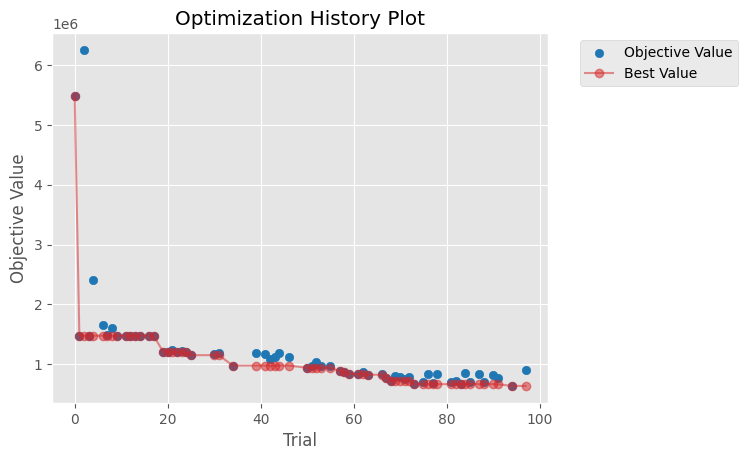

In [36]:
plot_optimization_history(study)

/tmp/ipykernel_53096/3988485508.py:1: ExperimentalWarning: plot_intermediate_values is experimental (supported from v2.2.0). The interface can change in the future.
  plot_intermediate_values(study)


<Axes: title={'center': 'Intermediate Values Plot'}, xlabel='Step', ylabel='Intermediate Value'>

/mnt/disco1Tb/Dropbox/myDisk/phd/2023/AM2/am2/am2_venv/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/mnt/disco1Tb/Dropbox/myDisk/phd/2023/AM2/am2/am2_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


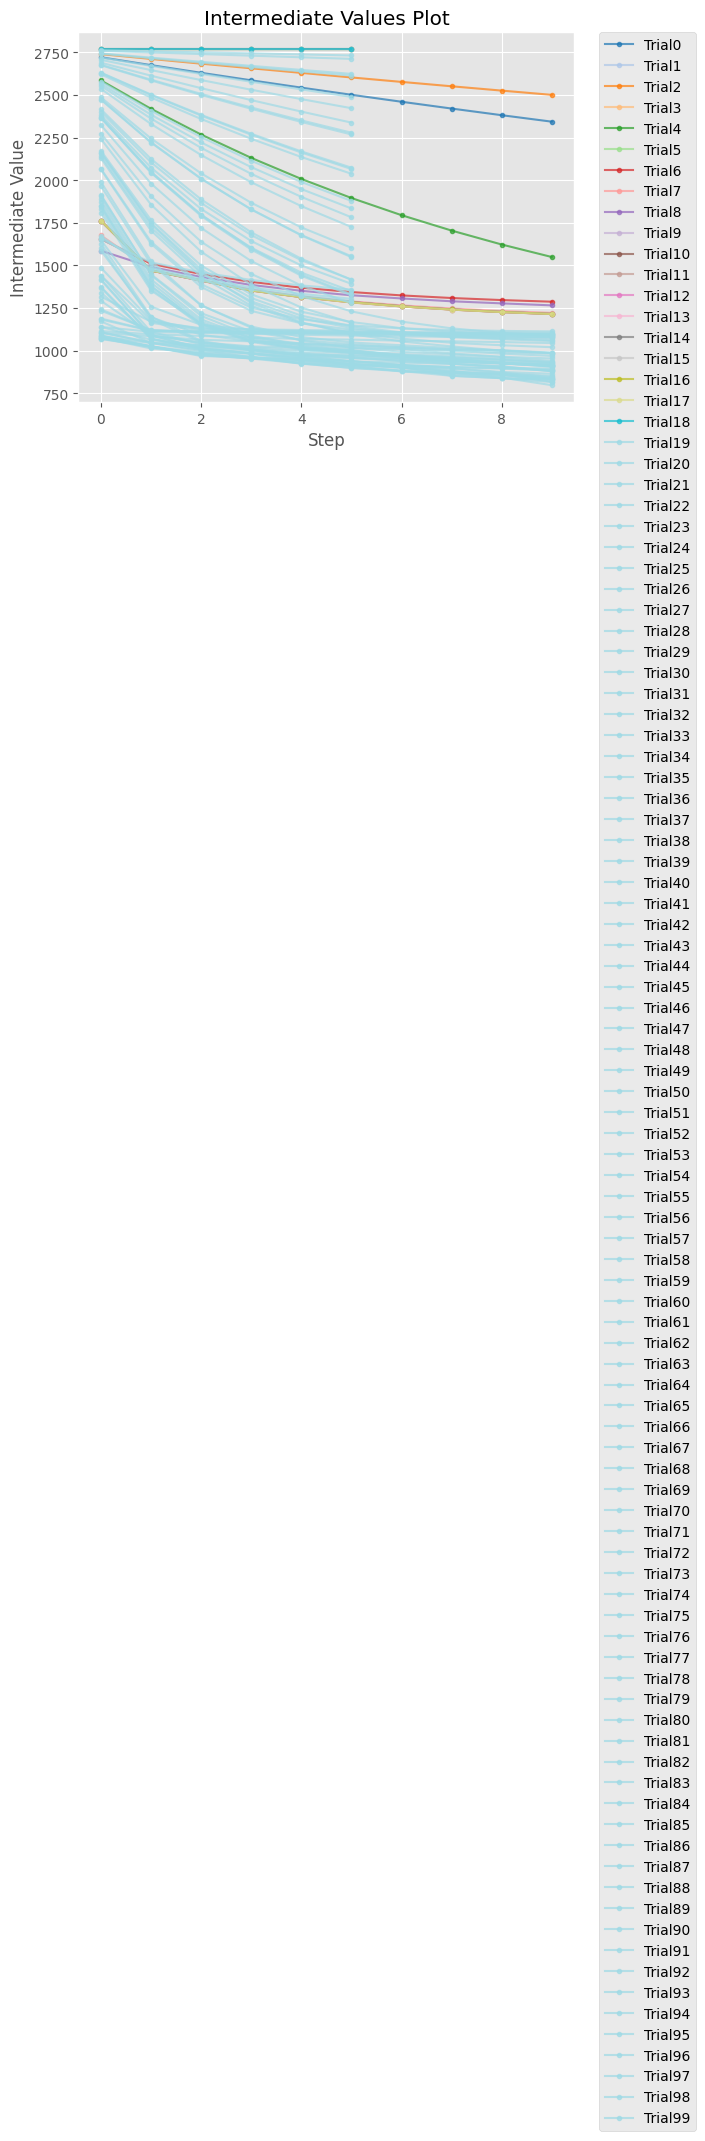

In [37]:
plot_intermediate_values(study)

/tmp/ipykernel_53096/927314822.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  plot_contour(study)
[W 2023-06-25 16:31:09,743] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


array([[<Axes: ylabel='alpha'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='booster'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='eta'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='gamma'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='grow_policy'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='lambda'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='max_depth'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
     

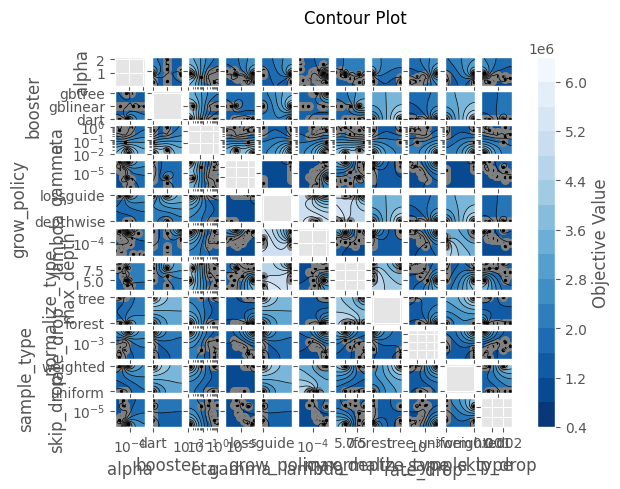

In [38]:
plot_contour(study)

/tmp/ipykernel_53096/3836449081.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


<Axes: title={'center': 'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

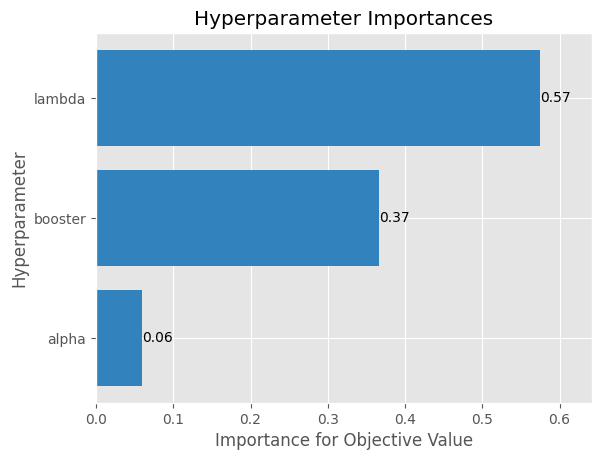

In [39]:
plot_param_importances(study)